# Packages

In [9]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sn
from matplotlib import style
style.use('seaborn-dark')
#from google.colab import drive #allows to mount drive

# Import Data

In [2]:
#drive.mount('/content/drive')

Importing data

In [2]:
data = pd.read_pickle(r'dirty_data')

Examine dataframe:

In [4]:
data

,Date,Kommune,Area,Region,Location,longitude,latitude,altitude,Cases,Tested,Code,Alternative Code,Antal_døde,Temperature,CO2Emission,Daylength,Gennemsnit for alle personer (kr.)
0,2019-01-01,Fredensborg kommune,NaN,NaN,NaN,12.401836,55.979291,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,25474.371041,NaN
1,2019-01-01,Skanderborg,NaN,NaN,NaN,9.862985,56.084998,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,25390.986357,NaN
2,2019-01-01,Halsnæs Kommune,NaN,NaN,NaN,12.015366,55.976703,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,25476.501162,NaN
3,2019-01-01,Christiansø hører under Forsvarsministeriet,NaN,NaN,NaN,15.189678,55.320461,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,25982.760867,NaN
4,2019-01-01,Aalborg,NaN,NaN,NaN,9.919488,57.046108,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,24596.569354,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61425,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309448.0
61426,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308082.0
61427,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307772.0
61428,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302365.0


In [31]:
data.dtypes

Date                                  datetime64[ns]
Kommune                                       object
Area                                          object
Region                                        object
Location                                      object
longitude                                    float64
latitude                                     float64
altitude                                     float64
Cases                                        float64
Tested                                       float64
Code                                         float64
Alternative Code                              object
Antal_døde                                   float64
Temperature                                  float64
CO2Emission                                  float64
Daylength                                    float64
Gennemsnit for alle personer (kr.)           float64
dtype: object

# Identify missing data

For a simple overview of missing data we construct a heatmap:

<AxesSubplot:>

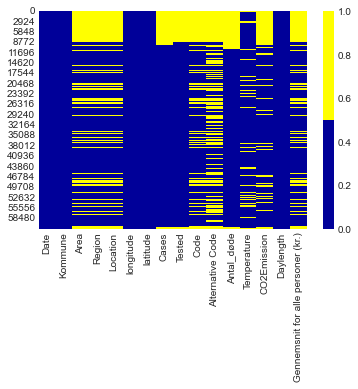

In [41]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sn.heatmap(data.isnull(), cmap=sn.color_palette(colours))

A list view of missing values:

In [17]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Date - 0%
Kommune - 0%
Area - 33%
Region - 33%
Location - 33%
longitude - 0%
latitude - 0%
altitude - 0%
Cases - 16%
Tested - 15%
Code - 34%
Alternative Code - 52%
Antal_døde - 18%
Temperature - 16%
CO2Emission - 28%
Daylength - 0%
Gennemsnit for alle personer (kr.) - 33%


## Adjustment of missing values

## Date

We can see that there are indeed some Not-a-Time values in the dataframe print from previous

In [27]:
data[data['Date'].isnull()]

,Date,Kommune,Area,Region,Location,longitude,latitude,altitude,Cases,Tested,Code,Alternative Code,Antal_døde,Temperature,CO2Emission,Daylength,Gennemsnit for alle personer (kr.)
61397,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353203.0
61398,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342385.0
61399,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437574.0
61400,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339955.0
61401,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388125.0
61402,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295586.0
61403,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318459.0
61404,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290740.0
61405,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330436.0
61406,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414861.0


In [29]:
data = data.drop(data[data['Date'].isnull()].index)

### Area

In [30]:
data[data['Area'].isnull()]

,Date,Kommune,Area,Region,Location,longitude,latitude,altitude,Cases,Tested,Code,Alternative Code,Antal_døde,Temperature,CO2Emission,Daylength,Gennemsnit for alle personer (kr.)
0,2019-01-01,Fredensborg kommune,NaN,NaN,NaN,12.401836,55.979291,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,25474.371041,NaN
1,2019-01-01,Skanderborg,NaN,NaN,NaN,9.862985,56.084998,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,25390.986357,NaN
2,2019-01-01,Halsnæs Kommune,NaN,NaN,NaN,12.015366,55.976703,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,25476.501162,NaN
3,2019-01-01,Christiansø hører under Forsvarsministeriet,NaN,NaN,NaN,15.189678,55.320461,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,25982.760867,NaN
4,2019-01-01,Aalborg,NaN,NaN,NaN,9.919488,57.046108,0.0,NaN,NaN,NaN,NaN,NaN,6.441667,NaN,24596.569354,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61392,2021-08-30,Halsnæs Kommune,NaN,NaN,NaN,12.015366,55.976703,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4471.0,50633.988476,NaN
61393,2021-08-30,Allerød Kommune,NaN,NaN,NaN,12.317092,55.855804,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4471.0,50600.738381,NaN
61394,2021-08-30,Hillerød Kommune,NaN,NaN,NaN,12.238439,55.923870,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4471.0,50619.499370,NaN
61395,2021-08-30,Solrød Kommune,NaN,NaN,NaN,12.174182,55.536808,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50513.363136,NaN


## Temperature

In [37]:
data.Date.unique()

array(['2019-01-01T00:00:00.000000000', '2019-01-02T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-01-04T00:00:00.000000000',
       '2019-01-05T00:00:00.000000000', '2019-01-06T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2019-01-08T00:00:00.000000000',
       '2019-01-09T00:00:00.000000000', '2019-01-10T00:00:00.000000000',
       '2019-01-11T00:00:00.000000000', '2019-01-12T00:00:00.000000000',
       '2019-01-13T00:00:00.000000000', '2019-01-14T00:00:00.000000000',
       '2019-01-15T00:00:00.000000000', '2019-01-16T00:00:00.000000000',
       '2019-01-17T00:00:00.000000000', '2019-01-18T00:00:00.000000000',
       '2019-01-19T00:00:00.000000000', '2019-01-20T00:00:00.000000000',
       '2019-01-21T00:00:00.000000000', '2019-01-22T00:00:00.000000000',
       '2019-01-23T00:00:00.000000000', '2019-01-24T00:00:00.000000000',
       '2019-01-25T00:00:00.000000000', '2019-01-26T00:00:00.000000000',
       '2019-01-27T00:00:00.000000000', '2019-01-28

## CO2 Emission

# Irregular data (Outliers)

# Unnecessary data

Unnecessary data can be hard to identify early on in the project. We are looking for uninformative, irrelevant and duplicate type data

In [39]:
num_rows = len(data.index)
low_information_cols = [] #

for col in data.columns:
    cnts = data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

altitude: 100.00000%
0.0    61397
Name: altitude, dtype: int64



We see that the altitude is the same throughout the dataset (0) as it probably wasnt measured. We remove this value:

In [40]:
del data['altitude']

# Inconsistent data

# Data Correlation Plots

As we have now succesfully cleaned and ajusted data we can start doing some correlation plots:

Scatter Matrix:

Heatmap:

# FAIR

Renaming columns to be more intuitive

In [13]:
data.columns

Index(['Date', 'Kommune', 'Area', 'Region', 'Location', 'longitude',
       'latitude', 'altitude', 'Cases', 'Tested', 'Code', 'Alternative Code',
       'Antal_døde', 'Temperature', 'CO2Emission', 'Daylength',
       'Gennemsnit for alle personer (kr.)'],
      dtype='object')

In [15]:
column_names = ['Date', 'Municipality', 'Area', 'Region', 'Location', 'Longitude',
               'Latitude', 'Altitude', 'Cases', 'Tested', 'MunicipalityCode', 'AlternativeCode',
               'Deaths', 'Temperature', 'CO2Emission', 'Daylength',
               'AverageIncome']

Save to .csv format which will be useful for later use